# K-Means in Python

In [21]:
#import the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Import the dataframe
df = pd.read_csv('data/Hall_members.csv')

In [6]:
df.shape #dimensions

(39674, 22)

In [7]:
df.head() #first five rows

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,4766,1,98,CT,5000,0.0,1.0,"HUNTINGTON, Benjamin",...,1800.0,0.639,0.304,-29.04670,0.708,84.0,12.0,NaN,0.649,0.229
2,1,House,8457,1,98,CT,5000,0.0,1.0,"SHERMAN, Roger",...,1793.0,0.589,0.307,-40.59580,0.684,107.0,18.0,NaN,0.614,0.298
3,1,House,9062,1,98,CT,5000,0.0,1.0,"STURGES, Jonathan",...,1819.0,0.531,0.448,-25.87361,0.724,80.0,13.0,NaN,0.573,0.529
4,1,House,9489,1,98,CT,5000,0.0,1.0,"TRUMBULL, Jonathan, Jr.",...,1809.0,0.692,0.246,-30.47113,0.750,106.0,11.0,NaN,0.749,0.166


In [8]:
#Keeping only member of the 105th congress up to the current congress
df = df[df['congress'] > 105]
df.shape

(4890, 22)

In [9]:
#Extracting the nominate scores
keep = ['nominate_dim1', 'nominate_dim2']
df2 = df[keep]
df2.head()

,nominate_dim1,nominate_dim2
34784,-0.438,0.033
34785,0.373,0.202
34786,-0.132,0.612
34787,0.414,0.528
34788,0.387,0.228


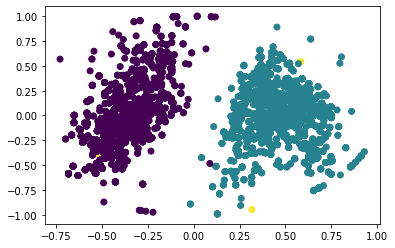

In [11]:
fig, ax = plt.subplots() #creating the figure and axis objects
ax.scatter(df['nominate_dim1'], df['nominate_dim2'], c= df['party_code']) # plotting nominate scores by party_code
plt.show()

In [17]:
#Removing any missing or infinite values in the dataframes.
df2 = df2[~df2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
print(df2.shape)
print(df.shape)

(4887, 2)
(0, 22)


## K-Means Algorithm

In [22]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Setting two clusters to the algorithm
cluster_2 = KMeans(n_clusters = 2, init = 'random', n_init = 50, algorithm = 'full', random_state = 1987)
cluster_2.fit(df2)
df2['cluster_2'] = cluster_2.fit_predict(df2) #Adding the predictions to our dataframe for plotting purposes.

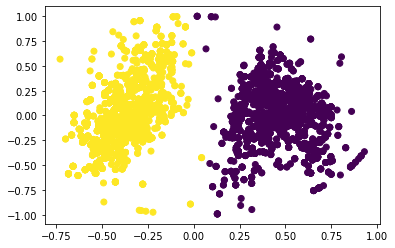

In [23]:
fig, ax = plt.subplots() #Creating the figure and axis objects
ax.scatter(df2['nominate_dim1'], df2['nominate_dim2'], c = df2['cluster_2']) #plotting nominate scores by cluster
plt.show()

In [24]:
#Removing the cluster 2 variable in df2
df2 = df2[keep]

print(cluster_2.fit(df2).inertia_) #errors
print(cluster_2.fit(df2).cluster_centers_) #cluster centers

546.0841900740654
[[ 0.45274273  0.0201824 ]
 [-0.37840951 -0.00092971]]


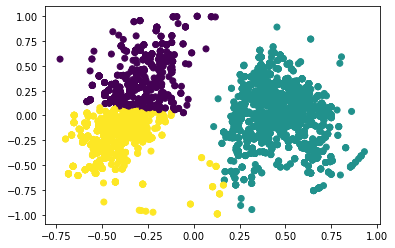

In [25]:
#Setting three clusters to the algorithm
cluster_3 = KMeans(n_clusters = 3, init = 'random', n_init = 50, algorithm = 'full', random_state = 1987)
#Removing the cluster 2 variable in df2
df2 = df2[keep]
#Fitting the data
cluster_3.fit(df2)
#Adding the new column for 3 clusters to df3
df2['cluster_3'] = cluster_3.fit_predict(df2)

fig, ax = plt.subplots() #Creating the figure and axis objects
ax.scatter(df2['nominate_dim1'], df2['nominate_dim2'], c = df2['cluster_3'])
plt.show()

In [26]:
#Removing the cluster 3 variable in df2
df2 = df2[keep]

#Iterating over 20 clusters to create the sum of squared distances for each cluster
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k, init = 'random', n_init = 50, algorithm = 'full')
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

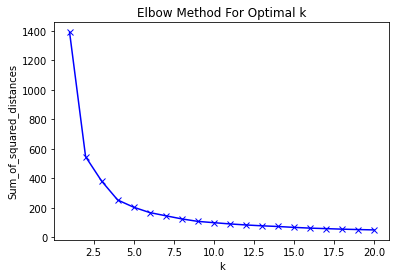

In [27]:
#Creating the Elbow plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
#Multiple runs of K_Means to select the lowest error
Sum_of_squared_distances = []
for i in range(10):
    km = KMeans(n_clusters=2, init = 'random', n_init = 50, algorithm = 'full', random_state = i)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0926973373951, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654]


In [29]:
#Multiple runs of K_Means to select the lowest error (1 iteration)
Sum_of_squared_distances = []
for i in range(1, 20):
    km = KMeans(n_clusters=2, init = 'random', n_init = 1, algorithm = 'full')
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0926973373951, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654]


In [30]:
#Multiple runs of K_Means to select the lowest error (2 iterations)
Sum_of_squared_distances = []
for i in range(1, 20):
    km = KMeans(n_clusters=2, init = 'random', n_init = 3, algorithm = 'full')
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[546.0926973373951, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0926973373951, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0926973373951, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654, 546.0841900740654]
